#Problemas de Valores inciales

##Método de Euler y Heun

Este método consiste en resolver el problema de valores iniciales:

$y'(x)=f(x,y(x))$

Que se resuelve integrando a ambos lados en un intervalo $[x_i,x_{i+1}]$:

$\int_{x_i}^{x_{i+1}} y'(x)$ $dx = \int_{x_i}^{x_{i+1}} f(x,y(x))$ $dx = y(x_{i+1})-y(x_i)$

Para el método de euler la integral se aproxima por Riemann:

$\int_{x_i}^{x_{i+1}} f(x,y(x))$ $dx \approx h \cdot f(x_i,y(x_i))$

Luego la solución tiene la forma:

$y_{i+1}=y_i+h \cdot f(x_i,y_i)$

Para el método de Heun se aproxima por la regla de los trapecios:

$\int_{x_i}^{x_{i+1}} f(x,y(x))$ $dx \approx \dfrac {h}{2} \cdot \left[f(x_i,y(x_i))+f(x_{i+1},y(x_{i+1})) \right]$


Y para este método tiene la forma:


$y_{i+1} = y_i+ \dfrac {h}{2} \cdot \left[f(x_i,y_i)+f(x_{i+1},y_{i+1}) \right]$

En donde h, que se conoce como paso, viene dado por:

$ h=x_{i+1}-x_i$





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:186: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:189: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:189: RuntimeWarning: invalid value encountered in double_scalars


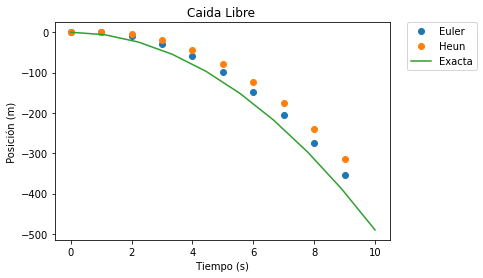

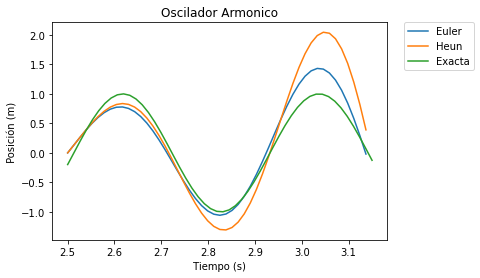

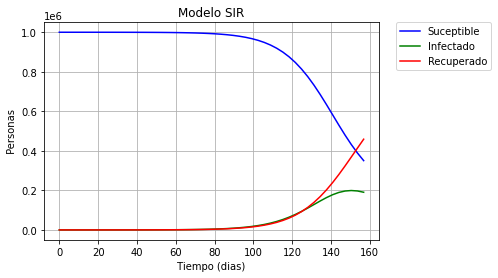

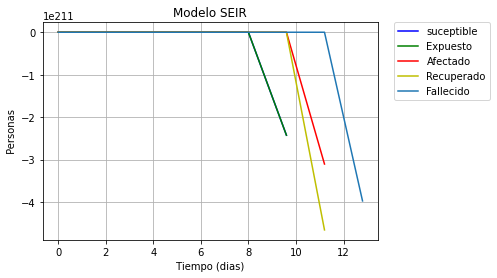

In [0]:
#Método de Euler y de Heun
import numpy as np #Importamons numpy
import matplotlib.pyplot as plt #Importamos matplotlib.pyplot

#Valores Iniciales

#Primer problema

xz=0 #Tiempo inicial
xf=10 #Tiempo final
N1=10 #Numero de pasos a realizar
yz=0 #Valor incial de la derivada
g=-9.80 #Aceleracion de la gravedad

#Segundo problema

xz2=2.5 #Tiempo inicial
xf2=3.15 #Tiempo final
yz2=0 #Valor incial de la derivada
yp2=10
N2=50 #Numero de pasos a realizar
w=15 #velocidad angular para el segundo problema.

#Tercer problema
xz3=0
xf3=160
N3=50
Nper=1E6
Iper=10
Rper=0
uz=(Nper-Iper-Rper,Iper,Rper)
Rz=2.2
ga=1/14
be=Rz*ga
#Cuarto problema:
N4=100
Rz2=2.2
Nper2=1E6
Sper=1E6
Eper=10
Aper=10
Reper=0
Fper=0
uz2=(Sper-Eper-Aper-Reper-Fper,Eper,Aper,Reper,Fper)
de=1
ep=1.2
na=1.2
ep=0.8
up=0.8
gam=1/14
bes=Rz2*gam


#Definimos el método de Euler para una EDO de primer orden:
def EULER(f,x1,x2,y1,n): #f=función,x1=inicio,x2=fin,y1=derivada incial,n=numero de pasos
    y=np.zeros([n]) #Array para guardar la información
    x=np.zeros([n]) #Array para guardar la información
    x[0]=x1 
    y[0]=y1 
    h=(x2-x1)/(n) #Paso
    for i in range(1,n):
        y[i]=y[i-1]+h*f(x[i-1],y[i-1])#Método de Euler
        x[i]=x[i-1]+h 
    return x,y #Resultado del método

#Definimos el método de Euler para una EDO de segundo orden:
def EULER2(f,x1,x2,y1,yp,n): #f=funcion,x1=inicio,x2=fin,y1=derivada incial,yp=valor de la segunda derivada inicial,n=numero de pasos
    y=np.zeros([n]) #Array para guardar la información
    yd=np.zeros([n])#Array para guardar la información
    x=np.zeros([n])#Array para guardar la información
    x[0]=x1  
    y[0]=y1  
    yd[0]=yp #Valor de la segunda derivada
    h=(x2-x1)/(n) #Paso
    for i in range(1,n):
        yd[i]=yd[i-1]+h*f(x[i-1],y[i-1],yd[i-1]) #Método de Euler para EDO vde segundo orden:
        y[i]=y[i-1]+h*yd[i-1] #Método de Euler para EDO de primer orden:
        x[i]=x[i-1]+h 
    return x,y #Resultado del método


def EULER3(f,x1,x2,y1,y2,y3,n): #f=función,x1=inicio,x2=fin,y1=derivada incial,n=numero de pasos
    yp1=np.zeros([n]) #Array para guardar la información
    yp2=np.zeros([n]) #Array para guardar la información
    yp3=np.zeros([n]) #Array para guardar la información
    x=np.zeros([n]) #Array para guardar la información
    x[0]=x1 
    yp1[0]=y1 
    yp2[0]=y2
    yp3[0]=y3 
    ffz=f[0]
    ff1=f[1]
    ff2=f[2]
    h=(x2-x1)/(n) #Paso
    for i in range(1,n):
         yp1[i]=yp1[i-1]+h*ffz(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1])#Método de Euler
         yp2[i]=yp2[i-1]+h*ff1(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1])#Método de Euler
         yp3[i]=yp3[i-1]+h*ff2(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1])#Método de Euler
         x[i]=x[i-1]+h 
    return x,yp1,yp2,yp3 #Resultado del método


def EULER5(f,x1,x2,y1,y2,y3,y4,y5,n): #f=función,x1=inicio,x2=fin,y1=derivada incial,n=numero de pasos
    yp1=np.zeros([n]) #Array para guardar la información
    yp2=np.zeros([n]) #Array para guardar la información
    yp3=np.zeros([n]) #Array para guardar la información
    yp4=np.zeros([n])
    yp5=np.zeros([n])
    x=np.zeros([n]) #Array para guardar la información
    x[0]=x1 
    yp1[0]=y1 
    yp2[0]=y2
    yp3[0]=y3 
    ffz=f[0]
    ff1=f[1]
    ff2=f[2]
    ff3=f[3]
    ff4=f[4]
    h=(x2-x1)/(n) #Paso
    for i in range(1,n):
         yp1[i]=yp1[i-1]+h*ffz(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1],yp4[i-1],yp5[i-1])#Método de Euler
         yp2[i]=yp2[i-1]+h*ff1(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1],yp4[i-1],yp5[i-1])#Método de Euler
         yp3[i]=yp3[i-1]+h*ff2(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1],yp4[i-1],yp5[i-1])#Método de Euler
         yp4[i]=yp4[i-1]+h*ff3(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1],yp4[i-1],yp5[i-1])#Método de Euler
         yp5[i]=yp5[i-1]+h*ff4(x[i-1],yp1[i-1],yp2[i-1],yp3[i-1],yp4[i-1],yp5[i-1])#Método de Euler
         x[i]=x[i-1]+h 
    return x,yp1,yp2,yp3,yp4,yp5 #Resultado del método


#Definimos el método de Heun para una EDO de primer orden:
def HEUN(f,x1,x2,y1,n):#f=funcion,x1=inicio,x2=fin,y1=derivada incial,n=numero de pasos
    y=np.zeros([n])#Array para guardar la información
    x=np.zeros([n])#Array para guardar la información
    x[0]=x1
    y[0]=y1
    h=(x2-x1)/(n)#Paso
    for i in range(1,n):
        y[i]=y[i-1]+(h/2)*((f(x[i-1],y[i-1])+f(x[i-2],y[i-2])))#Método de Heun
        x[i]=x[i-1]+h 
    return x,y #Resultado del método


#Definimos el método de Heun para una EDO de segundo orden:
def HEUN2(f,x1,x2,y1,yp,n):#f=funcion,x1=inicio,x2=fin,y1=derivada incial,yp=valor de la segunda derivada inicial,n=numero de pasos
    y=np.zeros([n]) #Array para guardar la información
    yd=np.zeros([n]) #Array para guardar la información
    x=np.zeros([n]) #Array para guardar la información
    x[0]=x1
    y[0]=y1
    yd[0]=yp
    h=(x2-x1)/(n) #Paso
    for i in range(1,n):
        yd[i]=yd[i-1]+(h/2)*((f(x[i-1],y[i-1],yd[i-1])+f(x[i-2],y[i-2],yd[i-2])))#Método de Heun para EDO de segundo orden:
        y[i]=y[i-1]+h*yd[i-1] #Método de Heun para EDO de primer orden:
        x[i]=x[i-1]+h 
    return x,y #Resultado del método


#Problemas a resolver:

#Caida libre

def FFALL(x,y):#Definicion de la función
    return g*x 

#Oscilador Armonico

def SPRING(x,y,yp):
    return(-1.0*w**2*y)

#Modelo SIR

def SIR1(x,s,i,r):
    return(-be*i*s/Nper)

def SIR2(x,s,i,r):
    return(be*i*s/Nper-ga*i)

def SIR3(x,s,i,r):
    return(ga*i)

SIR=[SIR1,SIR2,SIR3]

#Modelo SIAR

def SIAR1(x,s,e,i,r,d):
    return(-bes*e*s-de*i*s)

def SIAR2(x,s,e,i,r,d):
    return(-bes*e*s+de*i*s-ep*e-na*e)

def SIAR3(x,s,e,i,r,d):
    return(ep*e-gam*i-up*i)

def SIAR4(x,s,e,i,r,d):
    return(gam*i+na*e)

def SIAR5(x,s,e,i,r,d):
    return(up*i)

SIAR=[SIAR1,SIAR2,SIAR3,SIAR4,SIAR5]

#Grafica de los resultados:

#Primer problema

plt.figure(0)
t=np.linspace(xz,xf,N1) 
ex=(1/2)*g*t**2 #Solución Exacta del problema
se=EULER(FFALL,xz,xf,yz,N1) #Método de Euler
sh=HEUN(FFALL,xz,xf,yz,N1)  #Método de Heun
plt.plot(se[0],se[1],'o',label="Euler")
plt.plot(sh[0],sh[1],'o',label="Heun")
plt.plot(t,ex,label="Exacta") #Etiquetas
plt.xlabel(" Tiempo (s) ")
plt.ylabel(" Posición (m) ")
plt.title("Caida Libre " )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Segundo problema

plt.figure(1)
t2=np.linspace(xz2,xf2,N2)
ex2=np.sin(w*t2) #Solución Exacta
ses=EULER2(SPRING,xz2,xf2,yz2,yp2,N2) #Método de Euler
shs=HEUN2(SPRING,xz2,xf2,yz2,yp2,N2)  #Método de Heun
plt.plot(ses[0],ses[1],label="Euler")
plt.plot(shs[0],shs[1],label="Heun")
plt.plot(t2,ex2,label="Exacta") #Etiquetas
plt.xlabel(" Tiempo (s) ")
plt.ylabel(" Posición (m) ")
plt.title("Oscilador Armonico" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(2)
see=EULER3(SIR,xz3,xf3,uz[0],uz[1],uz[2],N3) #Método de Euler
plt.plot(see[0],see[1],"-b",label="Suceptible")
plt.plot(see[0],see[2],"-g",label="Infectado")
plt.plot(see[0],see[3],"-r",label="Recuperado")
plt.xlabel(" Tiempo (dias) ")
plt.ylabel(" Personas ")
plt.title("Modelo SIR")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(3)
seir=EULER5(SIAR,xz3,xf3,uz2[0],uz2[1],uz2[2],uz2[3],uz2[4],N4)
plt.plot(seir[0],seir[1],"-b",label="suceptible")
plt.plot(seir[0],seir[2],"-g",label="Expuesto")
plt.plot(seir[0],seir[3],"-r",label="Afectado")
plt.plot(seir[0],seir[4],"-y",label="Recuperado")
plt.plot(seir[0],seir[5],"-",label="Fallecido")
plt.xlabel(" Tiempo (dias) ")
plt.ylabel(" Personas ")
plt.title("Modelo SEIR")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




##Métodos Runge-Kutta


El método consiste en aproximar la integral  con un polinomio interpolador:

$f(x,y(x))=\sum_{j=0}^{n} \left[l_j(x) \cdot f(\tau_j,y(\tau_j)) \right]$

Que expresa un polinomio interpolador constituido por $n-1$ nodos, es decir, un polinomio de grado $n-2$.

$x_i=\tau_0$

$x_{i+1}=\tau_n$

La integral queda del modo:

$\int_{x_i}^{x_{i+1}} f(x,y(x))$ $dx \approx \sum_{j=0}^{n} \int_{x_i}^{x_{i+1}}  \left[l_j(x) \cdot f(\tau_j,y(\tau_j)) \right]$ $dx = \sum_{j=0}^{n} \left[ \omega _j \cdot f(\tau_j,y(\tau_j)) \right]$

Si a la hora de integrar el polinomio interpolador hacemos el cambio de variable:

$x=x_i+ \varepsilon \cdot H$

Teniéndose en cuenta que, si tomamos nodos equiespaciados:

$H= \dfrac {\tau_n-\tau_0}{n} = \dfrac {x_{i+1}-x_i}{n}$

La expresión integral nos queda:

$\int_{x_i}^{x_{i+1}} f(x,y(x))$ $dx \approx H \cdot \sum_{j=0}^{n} \left[ \beta_j \cdot f(\tau_j,y(\tau_j)) \right]$

Los valores $y(\tau_j)$ tales que $j>0$ son desconocidos. Para determinarlos, volvemos a aplicar una nueva fórmula de cuadratura, pero ahora esta será abierta por la derecha, obteniendo así un valor aproximado a dicho valor. Para un nodo arbitrario $\tau_k$ tendríamos:

$y(\tau_k)=y(x_i)+\int_{x_i}^{\tau_k} f(x,y(x))$ $dx \approx y(x_i) + H\cdot
\sum_{m=0}^{k-1} \int_{x_i}^{\tau_k} \left[l_{mk}(x) \cdot f(\tau_m,y(\tau_m)) \right]$ $dx = y(x_i)+ H\cdot \sum_{m=0}^{k-1} \left[ \alpha_{mk} \cdot f(x_m,y(x_m)) \right]$

Considerando ahora que tomamos un valor inicial aproximado, $y_i$, el método de Ruge-Kutta nos dice que el siguiente valor vendrá dado por:

$y_{i+1}=y_i+H\cdot \sum_{j=0}^{n} \left[ \beta_j \cdot f(\tau_j,\eta_j)) \right] $

En donde:

$\eta_{j} = y_i+H \cdot \sum_{k=0}^{j-1} \left[ \alpha_{kj} \cdot f(x_k,\eta_k)) \right]$

Los coeficientes $a_{kj}$ se calculan del siguiente modo:

$a_{kj} = \dfrac {1}{\prod_{k=0(k\neq j)}^{n} \left( j-k \right)} \cdot \int_{0}^{n}  \prod_{k=0(k\neq j)}^{n} \left( \varepsilon-k \right) $ $d\varepsilon$



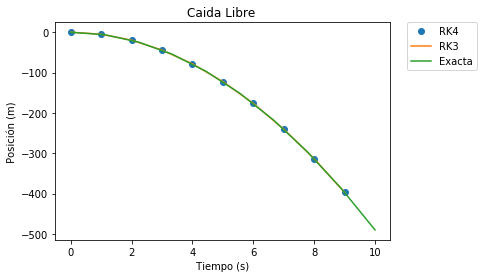

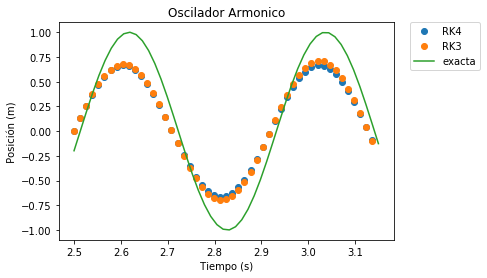

In [0]:
#Métodos Runge-Kutta de tercer y cuarto orden
import matplotlib.pyplot as plt #Importamos matplotlib
import numpy as np #Importamos Numpy

#Valores Iniciales

#Primer problema

xz=0 #Tiempo inicial
xf=10 #Tiempo final
N=10 #Numero de pasos a realizar
yz=0 #Valor incial de la derivada
g=-9.80 #Aceleracion de la gravedad

#Segundo problema

xz2=2.5 #Tiempo inicial
xf2=3.15 #Tiempo final
yz2=0 #Valor incial de la derivada
yp2=10
N2=50 #Numero de pasos a realizar
w=15 #velocidad angular para el segundo problema.





#Definimos el método Runge Kutta de Orden 4

def RK4(f,x1,x2,y1,n):#f=funcion,x1=inicio,x2=fin,y1=derivada incial,n=numero de pasos
    y=np.zeros([n]) #Array para guardar información
    x=np.zeros([n]) #Array para guardar información
    x[0]=x1
    y[0]=y1
    h=(x2-x1)/(n)
    for i in range(1,n):
        k1=h*f(x[i-1],y[i-1]) #Coeficientes de KR4
        k2=h*f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3=h*f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        k4=h*f(x[i-1]+h,y[i-1]+h*k3)
        y[i]=y[i-1]+(k1+2*k2+2*k3+k4)/6  
        x[i]=x[i-1]+h 
    return x,y #Resultado del método



#Definimos el método Runge Kutta de Orden 4 para una EDO de segundo orden

def RK42(f,x1,x2,y1,yp,n):#f=funcion,x1=inicio,x2=fin,y1=derivada incial,yp=valor de la segunda derivada inicial,n=numero de pasos
    y=np.zeros([n]) #Arrays para guardar la información
    y=np.zeros([n])
    yd=np.zeros([n])
    x=np.zeros([n])
    x[0]=x1
    y[0]=y1
    yd[0]=yp
    h=(x2-x1)/(n)
    for i in range(1,n):
        l1=h*yd[i-1]
        k1=h*f(x[i-1],y[i-1],yd[i-1])#Coeficientes de RK4 para EDO de segundo orden
        l2=h*(yd[i-1]+0.5*k1)
        k2=h*f(x[i-1]+0.5*h,y[i-1]+0.5*l1,yd[i-1]+0.5*k1)
        l3=h*(yd[i-1]+0.5*k2)
        k3=h*f(x[i-1]+0.5*h,y[i-1]+0.5*l2,yd[i-1]+0.5*k2)
        l4=h*(yd[i-1]+k3)
        k4=h*f(x[i-1]+h,y[i-1]+l3,yd[i-1]+k3)
        yd[i]=yd[i-1]+(k1+2*k2+2*k3+k4)/6  
        y[i]=y[i-1]+(l1+2*l2+2*l3+l4)/6  
        x[i]=x[i-1]+h 
    return x,y #Resultado del método


#Definimos el método Runge Kutta de Orden 3



def RK3(f,x1,x2,y1,n):#f=funcion,x1=inicio,x2=fin,y1=derivada incial,n=numero de pasos
    y=np.zeros([n])
    x=np.zeros([n])
    x[0]=x1
    y[0]=y1
    h=(x2-x1)/(n)
    for i in range(1,n):
        k1=h*f(x[i-1],y[i-1])
        k2=h*f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3=h*f(x[i-1]+h,y[i-1]-k1+2*k2)
        y[i]=y[i-1]+(k1+4*k2+k3)/6  
        x[i]=x[i-1]+h 
    return x,y #Resultado del método


#Definimos el método Runge Kutta de Orden 3 para una EDO de segundo orden


def RK32(f,x1,x2,y1,yp,n):#f=funcion,x1=inicio,x2=fin,y1=derivada incial,yp=valor de la segunda derivada inicial,n=numero de pasos
    y=np.zeros([n]) #Arrays para guardar la información
    y=np.zeros([n])
    yd=np.zeros([n])
    x=np.zeros([n])
    x[0]=x1
    y[0]=y1
    yd[0]=yp
    h=(x2-x1)/(n)
    for i in range(1,n):
        l1=h*yd[i-1] #Coeficientes de RK3 para edo de segundo orden
        k1=h*f(x[i-1],y[i-1],yd[i-1])
        l2=h*(yd[i-1]+0.5*k1)
        k2=h*f(x[i-1]+0.5*h,y[i-1]+0.5*l1,yd[i-1]+0.5*k1)
        l3=h*(yd[i-1]+0.5*k2)
        k3=h*f(x[i-1]+h,y[i-1]-l1+2*l2,yd[i-1]-k1+2*k2)
        yd[i]=yd[i-1]+(k1+4*k2+k3)/6  
        y[i]=y[i-1]+(l1+4*l2+l3)/6
        x[i]=x[i-1]+h 
    return x,y


#Problemas a resolver:

#Caida libre

def FFALL(x,y):#Definicion de la función
    return g*x 

#Oscilador Armonico

def SPRING(x,y,yp):
    return(-1.0*w**2*y)



#Grafica de los resultados:

#Primer problema
plt.figure(0)
t=np.linspace(xz,xf,N)
ex=(1/2)*g*t**2 #Solución exacta
s4=RK4(FREEFALL,xz,xf,yz,N)
s3=RK3(FREEFALL,xz,xf,yz,N)
plt.plot(s4[0],s4[1],"o",label="RK4")
plt.plot(s3[0],s4[1],label="RK3")
plt.xlabel(" Tiempo (s) ")
plt.plot(t,ex,label="Exacta")
plt.ylabel(" Posición (m) ")
plt.title("Caida Libre " )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Segundo problema

plt.figure(1)
t2=np.linspace(xz2,xf2,N2)
ex2=np.sin(w*t2) #Solución exacta
ses=RK42(SPRING,xz2,xf2,yz2,yp2,N2) 
scs=RK32(SPRING,xz2,xf2,yz2,yp2,N2) 
plt.plot(ses[0],ses[1],"o",label="RK4")
plt.plot(scs[0],scs[1],"o",label="RK3")
plt.plot(t2,ex2,label="exacta")
plt.xlabel(" Tiempo (s) ")
plt.ylabel(" Posición (m) ")
plt.title("Oscilador Armonico" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


##Métodos Predictor-Corrector

Como su nombre indica consiste en un par en el cual el predictor aproxima la solucion y el corrector busca la solución,para el caso simple tenemos:

El predictor se define:

$ y_{i+1,0}=y_{i-3}+ \dfrac {4h}{3} \cdot \left[ 2f(x_i,y_i)-f(x_{i-1},y_{i-1})+2f(x_{i-2},y_{i-2}) \right]$(predictor)

Y el corrector se define como:

$ y_{i+1,1}=y_{i-1}+\dfrac {h}{3} \cdot \left[ f(x_{i+1},y_{i+1,0}^{*})+4f(x_i,y_i)+f(x_{i-1},y_{i-1}) \right] $    (Corrector)

Por su parte, el corrector mejorado se define como:


$y_{i+1,0}^{*} = y_{i+1,0}+ \dfrac {28}{29} \cdot (y_{i,1}-y_{i,0})$   (Predictor mejorado)



$y_{i+1}=\dfrac {28 y_{i+1,1}+y_{i+1,0}}{29} $(Corrector-mejorado)

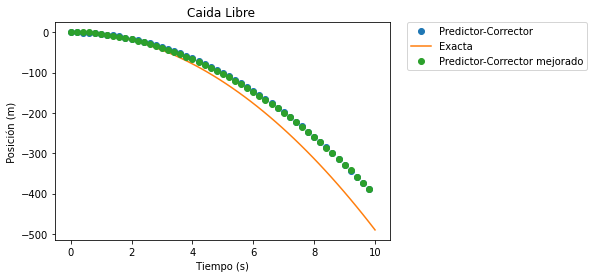

In [1]:
#Método predictor-corrector y predictor-corrector mejorado
import matplotlib.pyplot as plt #Importamos matplotlib
import numpy as np #Importamos Numpy


#Valores Iniciales

#Primer problema

xz=0 #Tiempo inicial
xf=10 #Tiempo final
N=50#Numero de pasos a realizar
yz=0 #Valor incial de la derivada
g=-9.80 #Aceleracion de la gravedad

#Definimos el método PC
def PC(f,x1,x2,y1,n):
	y=np.zeros([n])
	x=np.zeros([n])
	x[0]=x1
	y[0]=y1
	h=(x2-x1)/(n)
	py = np.zeros([n])
	for i in range(1,4):#Hacemos los cuatro primeros pasos por RK4
		k1=h*f(x[i-1],y[i-1])
		k2=h*f(x[i-1]+0.5*h,y1+0.5*h*k1)
		k3=h*f(x[i-1]+0.5*h,y1+0.5*h*k1)
		k4=h*f(x[i-1]+h,y1+h*k3)
		y[i]=y[i-1]+(k1+2*k2+2*k3+k4)/6 
		x[i]=x[i-1]+h 
	y1=y[i] 
	for i in range(4,n):
		py[i]=4*h/3*(2*f(x[i-1],y[i-1]) - f(x[i-2],y[i-2]) + 2*f(x[i-3],y[i-3]) ) + y[i-4] #Predictor
		y[i]=h/3*( f(x[i],py[i]) + 4*f(x[i-1],y[i-1]) + f(x[i-2],y[i-2]) ) + y[i-2]  #Corrector
		x[i]=x[i-1]+h 
	return x,y #Solución

def PCM(f,x1,x2,y1,n):
	y=np.zeros([n])
	x=np.zeros([n])
	ym=np.zeros([n])
	pym=np.zeros([n])
	x[0]=x1
	y[0]=y1
	h=(x2-x1)/(n)
	py = np.zeros([n])
	for i in range(1,4):#Hacemos los cuatro primeros pasos por RK4
		k1=h*f(x[i-1],y[i-1])
		k2=h*f(x[i-1]+0.5*h,y1+0.5*h*k1)
		k3=h*f(x[i-1]+0.5*h,y1+0.5*h*k1)
		k4=h*f(x[i-1]+h,y1+h*k3)
		y[i]=y[i-1]+(k1+2*k2+2*k3+k4)/6 
		x[i]=x[i-1]+h 
	y1=y[i] 
	for i in range(4,n):
		py[i]=4*h/3*(2*f(x[i-1],y[i-1])-f(x[i-2],y[i-2]) + 2*f(x[i-3],y[i-3]))+y[i-4] #Predictor
		y[i]=h/3*(f(x[i],py[i]) + 4*f(x[i-1],y[i-1])+f(x[i-2],y[i-2]) )+y[i-2] #Corrector 
		pym[i]=(28*py[i]+ym[i])/29 #Mejora del predictor
		ym[i]=y[i]+(28/29.)*(pym[i-1]-y[i-1])#Mejora del corrector
		x[i]=x[i-1]+h 
	return x,ym #Solución


#Problema a evaluar
def FREEFALL(x,y):
    return g*x

t=np.linspace(xz,xf,N)
ex=(1/2)*g*t**2 #Solución exacta
pcs=PC(FREEFALL,xz,xf,yz,N) #Método predictor-corrector
pcms=PCM(FREEFALL,xz,xf,yz,N)#Método precdictor-corrector mejorado
plt.plot(pcs[0],pcs[1],"o",label="Predictor-Corrector")
plt.plot(t,ex,label="Exacta")
plt.xlabel(" Tiempo (s) ")
plt.ylabel(" Posición (m) ")
plt.title("Caida Libre " )
plt.plot(pcms[0],pcms[1],"o",label="Predictor-Corrector mejorado")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

 

##Métodos Runge-Kutta mejorados

Finalmente los métodos Runge-Kutta mejorados,consisten en calcular con paso medio,y con paso el problema  y aproximar por la extrapolación de 
Richarson

$y\left( xi+1\right) =\dfrac {y_{i+1,1}-2^{m}y_{i+1,2}}{1-2^{m}}$

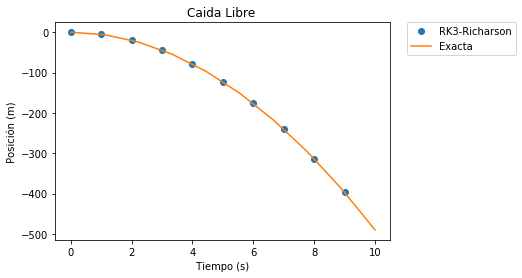

In [0]:
import matplotlib.pyplot as plt #Importamos matplotlib
import numpy as np #Importamos Numpy

#Valores Iniciales

#Primer problema

xz=0 #Tiempo inicial
xf=10 #Tiempo final
N=10#Numero de pasos a realizar
yz=0 #Valor incial de la derivada
g=-9.80 #Aceleracion de la gravedad


#Definimos el método RK3 mejorado
def RKM3(f,x1,x2,y1,n):
    yp=np.zeros([n])  #Arrays para guardar la información
    xp=np.zeros([n])
    y=np.zeros([2*n])
    x=np.zeros([2*n])
    s=np.zeros([n])
    xp[0]=x1
    yp[0]=y1
    x[0]=x1
    y[0]=y1
    h1=(x2-x1)/(n) #Paso
    h2=h1/2 #Paso medio
    for j in range(1,2*n):#Calculamos con RK3 con paso medio
        k12=h2*f(x[j-1],y[j-1])
        k22=h2*f(x[j-1]+0.5*h2,y[j-1]+0.5*h2*k12)
        k32=h2*f(x[j-1]+h2,y[j-1]-k12+2*k22)
        y[j]=y[j-1]+(k12+4*k22+k32)/6  
        x[j]=x[j-1]+h2
    for i in range(1,n):#Calculamos con RK3 con paso normal
        k1=h1*f(xp[i-1],yp[i-1])
        k2=h1*f(xp[i-1]+0.5*h1,yp[i-1]+0.5*h1*k1)
        k3=h1*f(xp[i-1]+h1,yp[i-1]-k1+2*k2)
        yp[i]=yp[i-1]+(k1+4*k2+k3)/6  
        xp[i]=xp[i-1]+h1
    s=(yp-(3**2)*y[::2])/(1-(3**2))#Extrapolacón de Richarson con la solución
    return xp,s #Solución

#Problema a evaluar

def FREEFALL(x,y):
    return g*x

#Grafica con los resultados:
s9=RKM3(FREEFALL,xz,xf,yz,N)
plt.plot(s9[0],s9[1],"o",label="RK3-Richarson")
t=np.linspace(xz,xf,N)
ex=(1/2)*g*t**2 #Solución Exacta
plt.plot(t,ex,label="Exacta")
plt.xlabel(" Tiempo (s) ")
plt.ylabel(" Posición (m) ")
plt.title("Caida Libre " )
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)